In [1]:
import os
import pandas as pd
import numpy as np
import math
from math import e

from sklearn.model_selection import train_test_split
from math import radians
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestNeighbors
from sklearn.metrics.pairwise import haversine_distances
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder









from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification


In [39]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def process_directory(file_directory, use_alternate_columns=False, num_runs=20):
    all_files = os.listdir(file_directory)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    csv_files.sort()

    # Initialize accumulators for each metric
    bayesRisk_totals = [0] * len(csv_files)

    for _ in range(num_runs):
        for idx, file_name in enumerate(csv_files):
            file_path = os.path.join(file_directory, file_name)
            data = pd.read_csv(file_path)

            if use_alternate_columns:
                observations = data[['reported_lat', 'reported_lon']]
            else:
                observations = data[['perturbed_latitude', 'perturbed_longitude']]
            
            secrets = data['location_id']

            X_train, X_test, y_train, y_test = train_test_split(observations, secrets, test_size=0.20)

            k = round(np.log(len(X_train)))

            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
            knn.fit(X_train, y_train)
            predicted_locations = knn.predict(X_test)

            bayesRisk_totals[idx] += (1 - accuracy_score(y_test, predicted_locations))
  
    
    # Calculate the averages
    bayesRisk_avg = [x / num_runs for x in bayesRisk_totals]

    return bayesRisk_avg

In [40]:
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\laplace\200'
b_l_uci=process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\staircase\200'

b_s_uci = process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\our_bl_50_delta_5\200'

b_o_uci = process_directory(directory_to_process)


In [41]:
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\laplace\200'
b_l_collected = process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\staircase\200'

b_s_collected = process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\our_bl_50_delta_5\200'

b_o_collected = process_directory(directory_to_process)

In [42]:
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\laplace\200'
b_l_geolife=process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\staircase\200'

b_s_geolife = process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\our_bl_50_delta_5\200'

b_o_geolife = process_directory(directory_to_process)

In [43]:
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\laplace\200'
b_l_tdrive=process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\staircase\200'

b_s_tdrive = process_directory(directory_to_process)
directory_to_process =  r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\our_bl_50_delta_5\200'

b_o_tdrive = process_directory(directory_to_process)

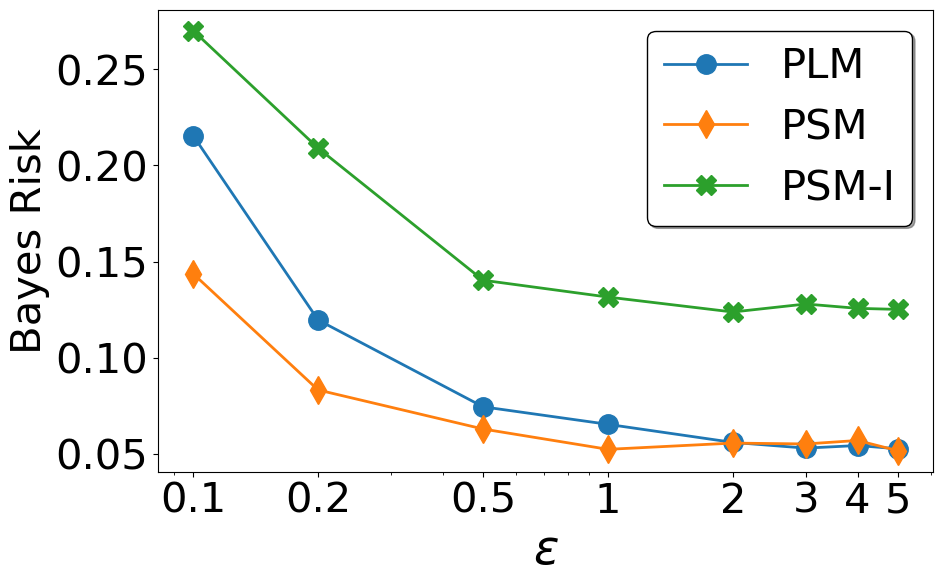

In [38]:
# Example data (assuming you have these data frames ready)
epsilon_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': b_l_collected, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'o', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': b_s_collected, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'd', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': b_o_collected, 'label': 'PSM-I', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('$\epsilon$', fontsize=34)
plt.ylabel('Bayes Risk', fontsize= 30)

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=30)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=30, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')
# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

# pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\png\tdrive_bayes_point_ln_200.png'
# plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\svg\tdrive_bayes_point_ln_200.svg'

# plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()


In [ ]:
# Example data (assuming you have these data frames ready)
epsilon_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': b_l_collected, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'o', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': b_s_collected, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'd', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': b_o_collected, 'label': 'PSM-I', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('$\epsilon$', fontsize=34)
plt.ylabel('Bayes Risk', fontsize= 30)

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=30)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=30, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')
# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

# pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\png\tdrive_bayes_point_ln_200.png'
# plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\svg\tdrive_bayes_point_ln_200.svg'

# plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()


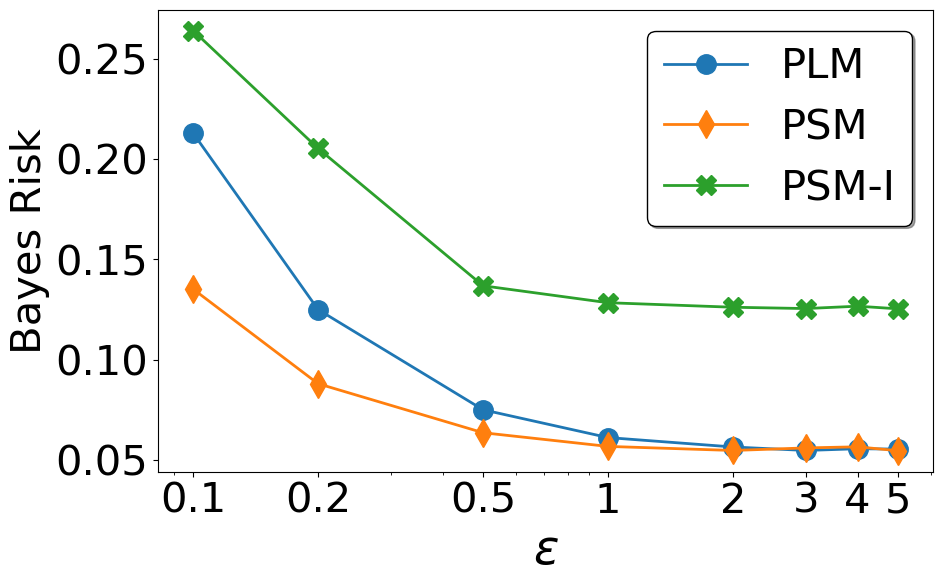

In [48]:
# Example data (assuming you have these data frames ready)
epsilon_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': b_l_collected, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'o', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': b_s_collected, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'd', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': b_o_collected, 'label': 'PSM-I', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('$\epsilon$', fontsize=34)
plt.ylabel('Bayes Risk', fontsize= 30)

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=30)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=30, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')
# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

# pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\png\tdrive_bayes_point_ln_200.png'
# plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\svg\tdrive_bayes_point_ln_200.svg'

# plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()


In [ ]:
# Example data (assuming you have these data frames ready)
epsilon_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': b_l_collected, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'o', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': b_s_collected, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'd', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': b_o_collected, 'label': 'PSM-I', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 14, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('$\epsilon$', fontsize=34)
plt.ylabel('Bayes Risk', fontsize= 30)

# Log scale for x-axis and setting specific ticks and labels
plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=30)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=30, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')
# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

# pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\png\tdrive_bayes_point_ln_200.png'
# plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\svg\tdrive_bayes_point_ln_200.svg'

# plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def process_directory(file_path, points_per_trajectory=2, num_runs=10, strategy = 'ln'):
    # Load data
    data = pd.read_csv(file_path)

    # Assume 'perturbed_latitude' and 'perturbed_longitude' are features
    # 'location_id' is the target
    X = data[['perturbed_latitude', 'perturbed_longitude']]
    y = data['location_id']

    # Variables to store total accuracy and Bayes risk across all runs
    total_accuracy = 0
    total_bayes = 0

    for run in range(num_runs):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 + run)  # Change random state each time
        
        if strategy == 'ln':
            k = round(np.log(len(X_train)))
        if strategy == 'log':
            k = round(math.log(len(X_train), 10))

        knn = KNeighborsClassifier(n_neighbors=k)
        # Initialize and train KNN
        knn = KNeighborsClassifier(n_neighbors=10)
        knn.fit(X_train, y_train)

        # Evaluate trajectories
        correct_predictions = 0
        total_predictions = 0

        for i in range(0, len(X_test), points_per_trajectory):
            prev_probs = None
            for j in range(points_per_trajectory):
                if i + j < len(X_test):
                    # Get probabilities for the current point
                    current_instance = X_test.iloc[[i + j]]  # Use double brackets to keep DataFrame structure
                    current_probs = knn.predict_proba(current_instance)[0]

                    if prev_probs is not None:
                        # Combine and normalize probabilities
                        combined_probs = (prev_probs + current_probs)
                        combined_probs /= np.sum(combined_probs)
                    else:
                        combined_probs = current_probs  # First point in trajectory

                    # Determine predicted class based on the combined probabilities
                    predicted_class = knn.classes_[np.argmax(combined_probs)]

                    # Check if the predicted class is correct
                    if predicted_class == y_test.values[i + j]:
                        correct_predictions += 1

                    # Update prev_probs for the next point in the trajectory
                    prev_probs = combined_probs

                    total_predictions += 1

        # Calculate accuracy for this run
        accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
        bayes = 1 - accuracy

        total_accuracy += accuracy
        total_bayes += bayes

    # Calculate average accuracy and Bayes risk
    average_accuracy = total_accuracy / num_runs
    average_bayes = total_bayes / num_runs

    #print("Average Accuracy:", average_accuracy)
    #print("Average Bayes Risk:", average_bayes)

    return  average_bayes

# Example usage
#directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\our_bl_50_delta_5\200\merged_our_bl_50_delta_5_1_encoded_200.csv'
#trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=2, num_runs=1,  strategy = 'ln')


In [21]:
bayes_list_laplace_ln_collected = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\laplace\200\merged_laplace_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_laplace_ln_collected.append(trajectory_accuracy)
bayes_list_laplace_ln_collected

[0.27656292286874146,
 0.17738385205232293,
 0.14230942715381145,
 0.12519621109607576,
 0.1147767253044655,
 0.10787550744248986,
 0.10277852954442941,
 0.0990978800180424,
 0.09622011727559765,
 0.09437077131258459]

In [22]:
bayes_list_staircase_ln_collected = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\staircase\200\merged_staircase_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_staircase_ln_collected.append(trajectory_accuracy)
bayes_list_staircase_ln_collected

[0.2737302661253947,
 0.1733964817320704,
 0.1376003608479928,
 0.12064952638700947,
 0.10997744700045106,
 0.10280559314388812,
 0.09790708164185837,
 0.09426251691474967,
 0.09103292737934146,
 0.08933694181326117]

In [23]:
bayes_list_our_ln_collected = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\machine_learning\attack1\our_bl_50_delta_5\200\merged_our_bl_50_delta_5_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_our_ln_collected.append(trajectory_accuracy)
    
bayes_list_our_ln_collected

[0.3209291835814163,
 0.2360126296797474,
 0.205403698691926,
 0.1901759133964817,
 0.18098331078033375,
 0.1756517816869644,
 0.17073522778529543,
 0.16771312584573753,
 0.16562020748759582,
 0.1637167343256653]

In [24]:
bayes_list_laplace_ln_geolife = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\laplace\200\merged_laplace_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_laplace_ln_geolife.append(trajectory_accuracy)
bayes_list_laplace_ln_geolife

[0.3622220438307779,
 0.29741510797142173,
 0.272505418640122,
 0.2598298145620936,
 0.2521875250862968,
 0.24741510797142166,
 0.24414385486072088,
 0.24081640844505095,
 0.23884964277113271,
 0.23733242353696715]

In [25]:
bayes_list_staircase_ln_geolife = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\staircase\200\merged_staircase_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_staircase_ln_geolife.append(trajectory_accuracy)
bayes_list_staircase_ln_geolife

[0.3615958898611223,
 0.29678092638677045,
 0.2715140081881673,
 0.25905916352251745,
 0.25115999036686204,
 0.24641968371196915,
 0.2431243477562816,
 0.2399133017580477,
 0.23798266035160953,
 0.2362848197800433]

In [4]:
bayes_list_our_ln_geolife = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\machine_learning\attack1\our_bl_50_delta_5\200\merged_our_bl_50_delta_5_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_our_ln_geolife.append(trajectory_accuracy)
    
bayes_list_our_ln_geolife

[0.377049048727623,
 0.31356666934253835,
 0.28995745364052333,
 0.27740627759492653,
 0.27001284418399296,
 0.2651681785341575,
 0.2617203178935538,
 0.25898691498755716,
 0.25696796981616765,
 0.2554708196194911]

In [5]:
bayes_list_laplace_ln_tdrive = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\laplace\200\merged_laplace_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_laplace_ln_tdrive.append(trajectory_accuracy)
bayes_list_laplace_ln_tdrive

[0.46423373136437507,
 0.4200240231752986,
 0.40209849501872397,
 0.3930050166042535,
 0.38762806472126055,
 0.3836430438776231,
 0.38183424009044026,
 0.3797286794319226,
 0.3778562848865965,
 0.37690948915424294]

In [6]:
bayes_list_staircase_ln_tdrive = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\staircase\200\merged_staircase_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_staircase_ln_tdrive.append(trajectory_accuracy)
bayes_list_staircase_ln_tdrive

[0.4641630749664382,
 0.4197484632233449,
 0.4016674909913093,
 0.3926234720553946,
 0.38730304529075105,
 0.38312725217268423,
 0.3813396453048824,
 0.3790786405709037,
 0.3775171341764997,
 0.376506747686003]

In [7]:
bayes_list_our_ln_tdrive = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\machine_learning\attack1\our_bl_50_delta_5\200\merged_our_bl_50_delta_5_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_our_ln_tdrive.append(trajectory_accuracy)
    
bayes_list_our_ln_tdrive

[0.4675121882286441,
 0.42371228714760123,
 0.4059210061471066,
 0.39686285593160464,
 0.3910195718222285,
 0.3875220801243552,
 0.385451847664806,
 0.3834452059634,
 0.3818766339292023,
 0.3804705716102592]

In [8]:
bayes_list_laplace_ln_uci = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\laplace\200\merged_laplace_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_laplace_ln_uci.append(trajectory_accuracy)
bayes_list_laplace_ln_uci

[0.5130337078651686,
 0.4844044943820225,
 0.47510112359550566,
 0.4666067415730337,
 0.46665168539325846,
 0.4613033707865169,
 0.46166292134831466,
 0.4591460674157304,
 0.45842696629213486,
 0.45842696629213486]

In [9]:
bayes_list_staircase_ln_uci = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\staircase\200\merged_staircase_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_staircase_ln_uci.append(trajectory_accuracy)
bayes_list_staircase_ln_uci

[0.512314606741573,
 0.48417977528089884,
 0.47532584269662925,
 0.46665168539325846,
 0.46629213483146065,
 0.4615730337078651,
 0.46143820224719106,
 0.45896629213483137,
 0.4584269662921348,
 0.4581123595505618]

In [10]:
bayes_list_our_ln_uci = []
directory_to_process = r'C:\Users\ss6365\Desktop\location_privacy_final\uci\machine_learning\attack1\our_bl_50_delta_5\200\merged_our_bl_50_delta_5_1_encoded_200.csv'

for i in range(2,21, 2):
    
    trajectory_accuracy = process_directory(directory_to_process, points_per_trajectory=i, num_runs=10,  strategy = 'ln')
    bayes_list_our_ln_uci.append(trajectory_accuracy)
    
bayes_list_our_ln_uci

[0.5164494382022471,
 0.48768539325842697,
 0.4793707865168539,
 0.4702022471910112,
 0.4698876404494382,
 0.46503370786516846,
 0.46449438202247195,
 0.46269662921348315,
 0.461932584269663,
 0.4617977528089887]

In [11]:
import numpy as np
import pandas as pd 

import os
import glob
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import numpy as np

In [36]:
df_laplace = [0.6026,	0.469,	0.3616,	0.2832,	0.21]
df_laplace = [1 - x for x in df_laplace]
df_laplace

[0.3974, 0.531, 0.6384000000000001, 0.7168, 0.79]

In [37]:
bayes_list_laplace_ln_collected

[0.27656292286874146,
 0.21250338294993232,
 0.17738385205232293,
 0.15686062246278756,
 0.14230942715381145,
 0.1330085701398286,
 0.12519621109607576,
 0.11954894000902123,
 0.1147767253044655]

In [38]:
bayes_list_staircase_ln_collected

[0.2737302661253947,
 0.20845286423094275,
 0.1733964817320704,
 0.15257555254848898,
 0.1376003608479928,
 0.12849797023004061,
 0.12064952638700947,
 0.1147677041046459,
 0.10997744700045106]

In [3]:
bayes_list_our_ln_collected

NameError: name 'bayes_list_our_ln_collected' is not defined

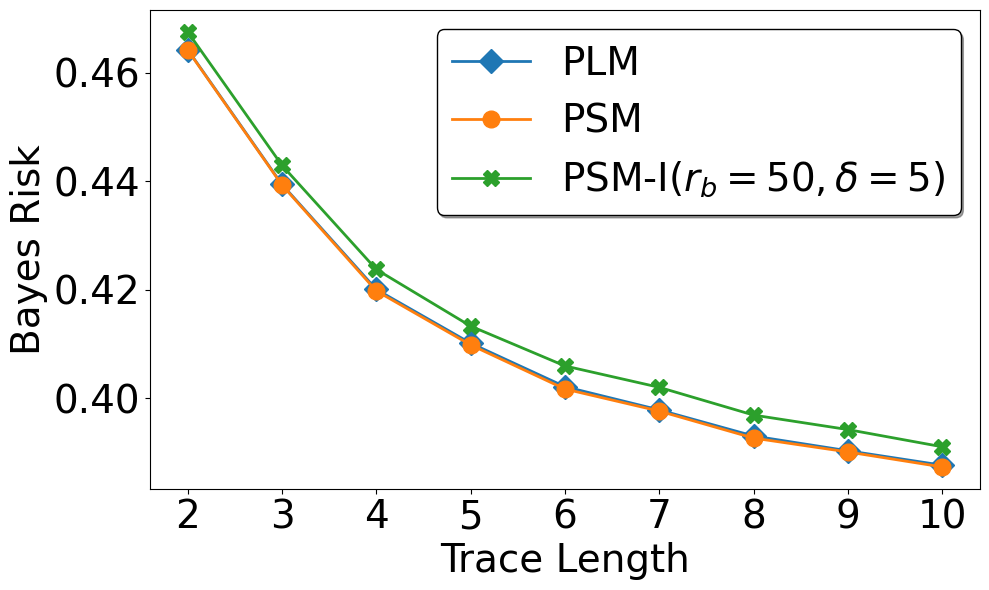

In [60]:


# Example data (assuming you have these data frames ready)
epsilon_values = [2, 3, 4, 5, 6, 7, 8, 9,10]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': bayes_list_laplace_ln_tdrive, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'D', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': bayes_list_staircase_ln_tdrive, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': bayes_list_our_ln_tdrive, 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('Trace Length', fontsize=28)
plt.ylabel('Bayes Risk', fontsize=28)

# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=28, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')

plt.tight_layout()

# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\png\tdrive_bayes_point_ln_200_tracelength.png'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\tdrive\figure\svg\tdrive_bayes_point_ln_200_tracelength.svg'

plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

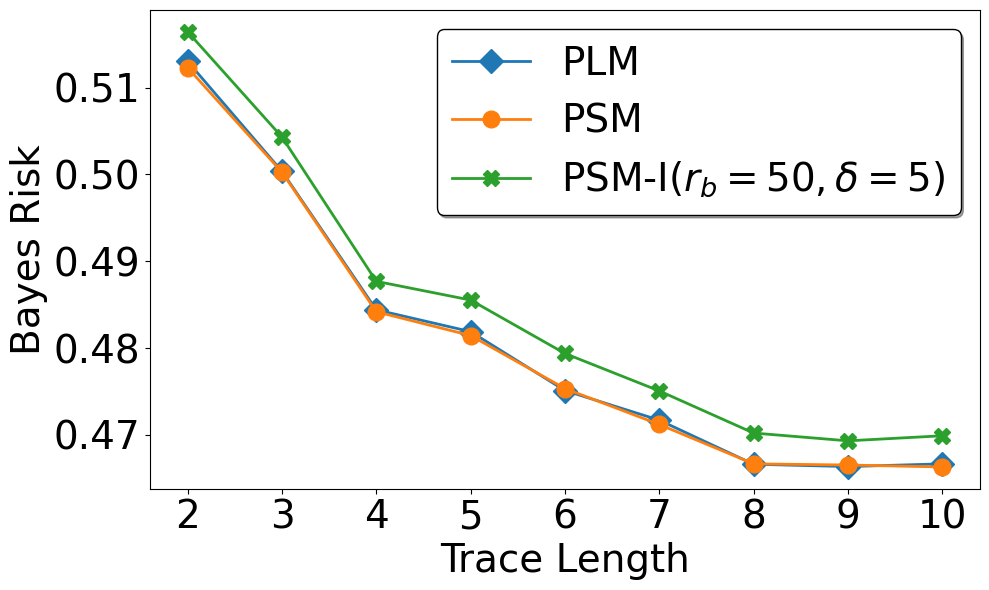

In [61]:


# Example data (assuming you have these data frames ready)
epsilon_values = [2, 3, 4, 5, 6, 7, 8, 9,10]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': bayes_list_laplace_ln_uci, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'D', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': bayes_list_staircase_ln_uci, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': bayes_list_our_ln_uci, 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('Trace Length', fontsize=28)
plt.ylabel('Bayes Risk', fontsize=28)

# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=28, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')

plt.tight_layout()

# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\uci\figure\png\uci_bayes_point_ln_200_tracelength.png'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\uci\figure\svg\uci_bayes_point_ln_200_tracelength.svg'

plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

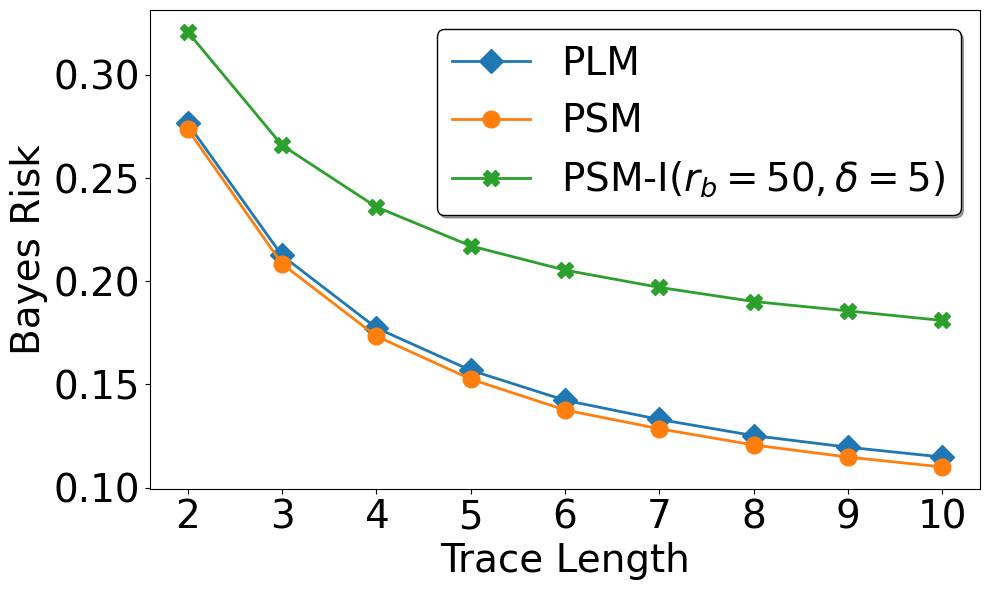

In [62]:


# Example data (assuming you have these data frames ready)
epsilon_values = [2, 3, 4, 5, 6, 7, 8, 9,10]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': bayes_list_laplace_ln_collected, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'D', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': bayes_list_staircase_ln_collected, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': bayes_list_our_ln_collected, 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('Trace Length', fontsize=28)
plt.ylabel('Bayes Risk', fontsize=28)

# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=28, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')

plt.tight_layout()

# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\figure\png\collected_bayes_point_ln_200_tracelength.png'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\collected\figure\svg\collected_bayes_point_ln_200_tracelength.svg'

plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()

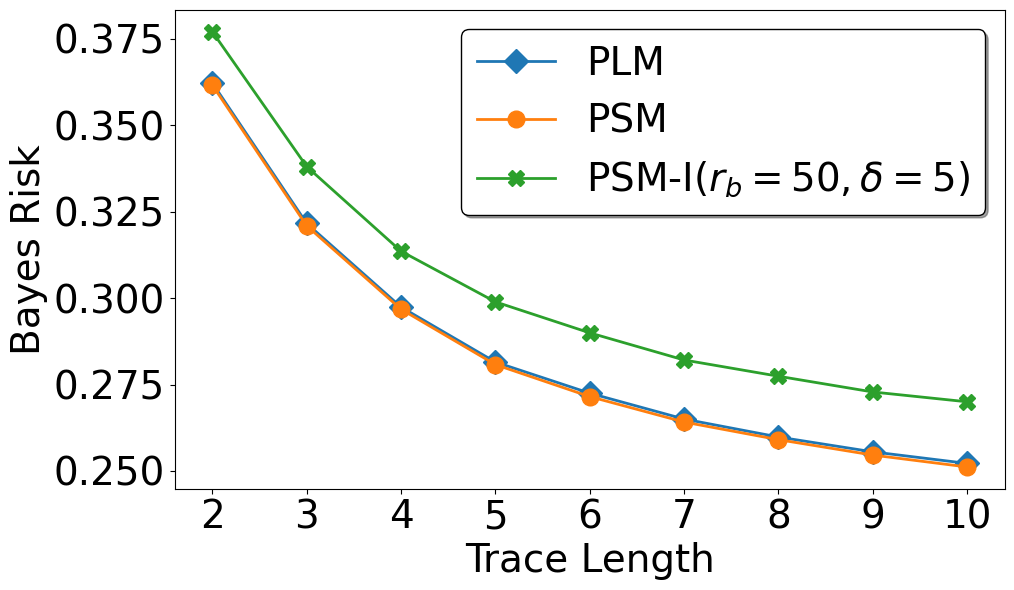

In [63]:


# Example data (assuming you have these data frames ready)
epsilon_values = [2, 3, 4, 5, 6, 7, 8, 9,10]

# Define lines with linestyle added
line1 = {'x': epsilon_values, 'y': bayes_list_laplace_ln_geolife, 'label': 'PLM', 'color': '#1F77B4', 'marker': 'D', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line2 = {'x': epsilon_values, 'y': bayes_list_staircase_ln_geolife, 'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
line3 = {'x': epsilon_values, 'y': bayes_list_our_ln_geolife, 'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}
#line4 = {'x': epsilon_values, 'y': df_laplace_delta_ln_200_collected['Bayes security measure'], 'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*', 'linewidth': 2, 'markersize': 12, 'linestyle': '-'}

plt.figure(figsize=(10, 6))

# Plot each line with improved settings
for line in [line1, line2, line3]:
    plt.plot(line['x'], line['y'], label=line['label'], color=line['color'], marker=line['marker'], linestyle=line['linestyle'], linewidth=line['linewidth'], markersize=line['markersize'])

# Labels for axes
plt.xlabel('Trace Length', fontsize=28)
plt.ylabel('Bayes Risk', fontsize=28)

# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)

# Adding a grid, legend, and ensuring layout is tight for best appearance
#plt.grid(True)
plt.legend(fontsize=28, frameon=True,shadow=True, loc='best').get_frame().set_edgecolor('black')

plt.tight_layout()

# Uncomment the following lines to save the plot if needed
# plt.savefig('/path/to/your/directory/filename.png', dpi=300, bbox_inches='tight')
# plt.savefig('/path/to/your/directory/filename.svg', format='svg', bbox_inches='tight')

pathpng = r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\figure\png\geolife_bayes_point_ln_200_tracelength.png'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

pathsvg = r'C:\Users\ss6365\Desktop\location_privacy_final\geolife\figure\svg\geolife_bayes_point_ln_200_tracelength.svg'

plt.savefig(pathsvg, format='svg', bbox_inches='tight')
# Display the plot
plt.show()